In [428]:

# agrega ruta de busqueda donde tenemos archivos .py
import sys
FUENTES_DIR = "../Recursos"
sys.path.append(FUENTES_DIR)

In [429]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics, model_selection

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
from ClassNeuronaGral import NeuronaGradiente


In [430]:
datos = pd.read_csv('../Datos/semillas.csv')
datos.head()

X = datos.iloc[:,:-1].values
T = np.array(datos['Clase'] == "Tipo2") *1

print(T)
# Para tahn
T = 2*T-1
print(T)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -

In [431]:
X_train, X_test, T_train, T_test = model_selection.train_test_split(X, T, test_size=0.40) #, random_state=42)
# normalizador = preprocessing.StandardScaler()
normalizador = preprocessing.MinMaxScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

In [432]:
# ppn = NeuronaGradiente(alpha=0.1, n_iter=200, cotaE=1e-03, FUN='sigmoid', random_state=None)
ppn = NeuronaGradiente(alpha=0.1, n_iter=200, cotaE=1e-03, FUN='tanh', random_state=None)
ppn.fit(X_train, T_train)

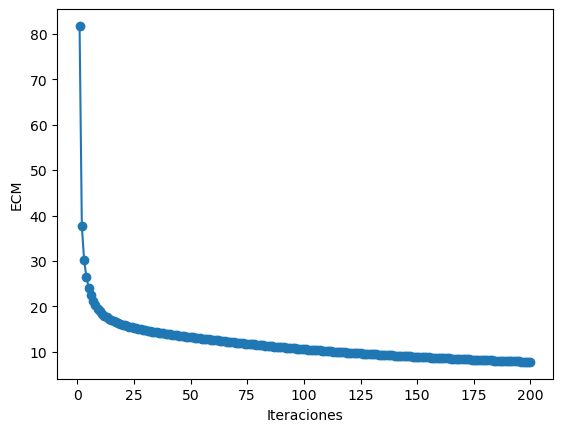

In [433]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [434]:
# Y = (ppn.predict(X_test)>0)*1
Y = ppn.predict(X_test)
print("Y = ", Y)
print("T = ", T_test)
aciertos = sum(Y == T_test)
print("aciertos = %d   (%.2f%%)" % (aciertos, 100*aciertos/X_test.shape[0]))

Y =  [-1 -1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1
 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1]
T =  [-1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1
 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1]
aciertos = 81   (96.43%)
